In [53]:
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np

from mpl_toolkits import mplot3d

In [2]:
t2E = lambda e, t : fsolve(lambda E : E - e*np.sin(E) - t, t/(1 - e))

In [60]:
e = .6 # eccentricity
n = 1000 # plot points
t = np.linspace(0, 9, n)
E = t2E(e, t)
x = np.cos(E) - e
y = np.sin(E)

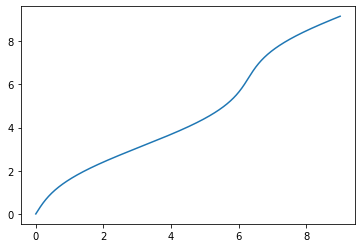

In [61]:
plt.plot(t, E)

In [62]:
def compute_eccentricity1(E, ell, m, mu):
    # E is the orbital energy
    # ell is the angular momentum
    # m is
    # mu is
    e = np.sqrt( 1 + ( (2*E*ell**2) / (m**3*mu**2) ) )
    return e   

def compute_eccentricity2(a,b):
    # a - semi-major axis
    # b - semi-minor axis
    e = np.sqrt( 1 - ( (b**2) / (a**2) ) )
    return e  

In [63]:
def compute_time(E,e,a):
    # 398600.4 is a gravitational parameter
    t = a * np.sqrt( a / 398600.4 ) * (E - e * np.sin(E))
    return t

In [64]:
a = 2
b = 1
alpha = 1
u = a * (np.cos(E) - e)
v = b * np.sin(E)

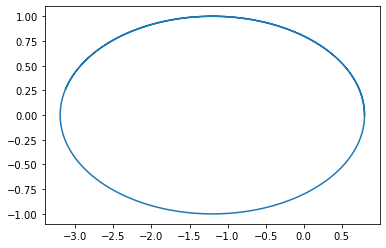

In [65]:
plt.plot(u,v)

In [67]:
theta = 45
lamb = 24

n = [np.cos(lamb) * np.sin(theta), np.sin(lamb) * np.sin(theta), np.cos(theta)]
k = [0,0,1]

P = np.cross(n,k)
Q = np.cross(n,P)

In [68]:
X = u*P[0] + v*Q[0]
Y = u*P[1] + v*Q[1]
Z = u*P[2] + v*Q[2]

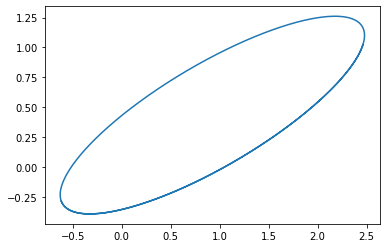

In [69]:
plt.plot(X,Y)

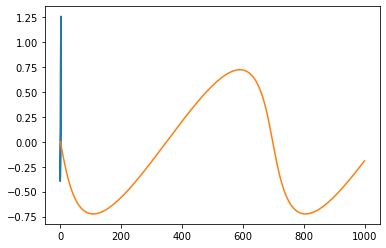

In [70]:
plt.plot(X,Y,Z)

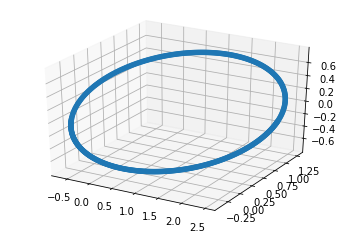

In [71]:
ax = plt.axes(projection='3d')
ax.scatter3D(X,Y,Z)

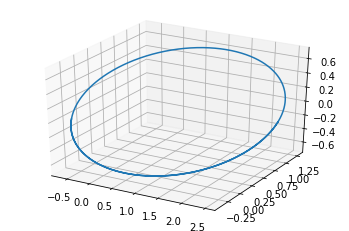

In [72]:
ax = plt.axes(projection='3d')
ax.plot3D(X,Y,Z)

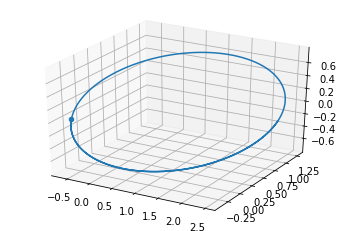

In [74]:
ax = plt.axes(projection='3d')
ax.plot3D(X,Y,Z)
ax.scatter3D(X[0],Y[0],Z[0])
plt.show()

In [104]:
@widgets.interact_manual( color=['blue', 'red', 'green'], lw=(1., 10.))
   
def plot(time=1., color='green', lw=2, grid=True):
    t = np.linspace(1., n, n)
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax = plt.axes(projection='3d')
    ax.plot3D(X,Y,Z)
    x = X[t]
    y = Y[t]
    z = Z[t]
    ax.scatter3D(x,y,z, lw=lw, color=color)
    ax.grid(grid)


interactive(children=(FloatSlider(value=1.0, description='time', max=3.0, min=-1.0), Dropdown(description='col…

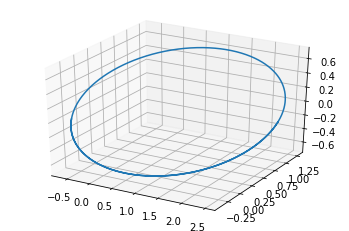

In [125]:
ax = plt.axes(projection='3d')
ax.plot3D(X,Y,Z)


my_slider = widgets.IntSlider()


def evolution(my_slider):
    ax.scatter3D(X[my_slider],Y[my_slider],Z[my_slider])
 

plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

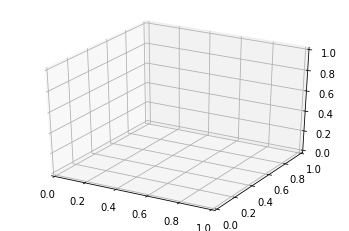

In [132]:
ax = plt.axes(projection='3d')
my_slider = widgets.IntSlider()



ax.scatter3D(X[my_slider],Y[my_slider],Z[my_slider])
